# Task
Predict arrests using the 2024 Chicago arrest data from the API "https://data.cityofchicago.org/resource/ijzp-q8t2.json" by loading all records for 2024, performing data cleaning, feature engineering, and training two models: an MLP model with one-hot encoded features and a multi-modal fusion model combining BERT embeddings with other features. Finally, evaluate model performance, compare results, and provide insights using XAI.

## Articulate Problem Statement and Objective

### Subtask:
Clearly define the problem of predicting arrests and the main objective of developing and evaluating models for this prediction.


### Problem Statement

The challenge is to accurately predict the likelihood of arrests based on historical Chicago arrest data. This involves identifying key features and patterns within the dataset that contribute to arrest outcomes, and developing a predictive model that can assess the probability of an arrest occurring given specific circumstances or characteristics.

### Objective

The primary objective of this project is to develop and evaluate various machine learning models capable of predicting arrests with a high degree of accuracy and reliability. The models should aim to:

1.  **Identify predictive factors:** Determine which variables are most influential in predicting arrests.
2.  **Quantify arrest probability:** Provide a probability score for an arrest given input features.
3.  **Benchmark performance:** Compare the performance of different models (e.g., CNN, Transformer, or hybrid models) using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, AUC-ROC).
4.  **Provide actionable insights:** The insights gained from the model should aid in understanding the factors contributing to arrests and potentially inform policy or resource allocation strategies.

## Load 2024 Arrest Data

### Subtask:
Access the API (https://data.cityofchicago.org/resource/ijzp-q8t2.json) and load ALL arrest data specifically for the year 2024 into a pandas DataFrame. This will require handling pagination to ensure all records beyond the default limit are retrieved, making multiple API calls with a chunk size of 10,000 records per call.


**Reasoning**:
To begin, I'll import the necessary libraries, define the API endpoint and initial parameters for data retrieval, then proceed to fetch data using a loop with pagination.



In [1]:
import requests
import pandas as pd

base_url = "https://data.cityofchicago.org/resource/ijzp-q8t2.json"
all_records = []
limit = 10000
offset = 0

print("Starting data retrieval from API...")
while True:
    params = {
        "$limit": limit,
        "$offset": offset,
        "year": 2024
    }
    response = requests.get(base_url, params=params)
    response.raise_for_status()  # Raise an exception for HTTP errors
    data = response.json()

    if not data:
        print(f"No more data found. Retrieved {len(all_records)} records.")
        break

    all_records.extend(data)
    offset += limit
    print(f"Fetched {len(data)} records, current total: {len(all_records)}. Next offset: {offset}")

df = pd.DataFrame(all_records)

print("\nData retrieval complete.")
print(f"Shape of the DataFrame: {df.shape}")
print("First 5 rows of the DataFrame:")
print(df.head())

Starting data retrieval from API...
Fetched 10000 records, current total: 10000. Next offset: 10000
Fetched 10000 records, current total: 20000. Next offset: 20000
Fetched 10000 records, current total: 30000. Next offset: 30000
Fetched 10000 records, current total: 40000. Next offset: 40000
Fetched 10000 records, current total: 50000. Next offset: 50000
Fetched 10000 records, current total: 60000. Next offset: 60000
Fetched 10000 records, current total: 70000. Next offset: 70000
Fetched 10000 records, current total: 80000. Next offset: 80000
Fetched 10000 records, current total: 90000. Next offset: 90000
Fetched 10000 records, current total: 100000. Next offset: 100000
Fetched 10000 records, current total: 110000. Next offset: 110000
Fetched 10000 records, current total: 120000. Next offset: 120000
Fetched 10000 records, current total: 130000. Next offset: 130000
Fetched 10000 records, current total: 140000. Next offset: 140000
Fetched 10000 records, current total: 150000. Next offset:

## Basic Data Inspection

### Subtask:
Perform initial data inspection using methods like df.head(), df.info(), and check for unique values to understand the dataset's structure and content.


**Reasoning**:
To perform the initial data inspection, I will display the first 5 rows, print a concise summary including data types and non-null values, and then determine the number of unique values for each column to understand the dataset's structure and content.



In [2]:
print("Displaying the first 5 rows of the DataFrame:")
print(df.head())

print("\nPrinting concise summary of the DataFrame:")
df.info()

print("\nCalculating unique values per column:")
print(df.nunique())

Displaying the first 5 rows of the DataFrame:
         id case_number                     date                  block  iucr  \
0  13364090    JH146864  2024-02-10T00:44:00.000        002XX W 47TH ST  0484   
1  13376308    JH161184  2024-02-22T00:49:00.000     044XX S KEDZIE AVE  0454   
2  13424244    JH219128  2024-04-09T21:54:00.000  064XX S CLAREMONT AVE  143A   
3  13335170    JH111953  2024-01-11T08:00:00.000     003XX N MENARD AVE  1320   
4  13373974    JH158444  2024-02-18T02:00:00.000   078XX S EBERHART AVE  0281   

              primary_type                                        description  \
0                  BATTERY  PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / ...   
1                  BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
2        WEAPONS VIOLATION                      UNLAWFUL POSSESSION - HANDGUN   
3          CRIMINAL DAMAGE                                         TO VEHICLE   
4  CRIMINAL SEXUAL ASSAULT                                    

TypeError: unhashable type: 'dict'

**Reasoning**:
The previous code failed because the 'location' column contains unhashable dictionary-like objects, which `df.nunique()` cannot process directly. To resolve this, I will modify the code to explicitly exclude the 'location' column when calculating unique values, thus preventing the TypeError.



In [3]:
print("Displaying the first 5 rows of the DataFrame:")
print(df.head())

print("\nPrinting concise summary of the DataFrame:")
df.info()

print("\nCalculating unique values per column (excluding 'location' column due to unhashable type):")
# Calculate nunique for all columns except 'location'
for col in df.columns:
    if col != 'location':
        print(f"{col}: {df[col].nunique()}")
    else:
        print(f"{col}: Contains dictionary objects, cannot calculate nunique directly.")

Displaying the first 5 rows of the DataFrame:
         id case_number                     date                  block  iucr  \
0  13364090    JH146864  2024-02-10T00:44:00.000        002XX W 47TH ST  0484   
1  13376308    JH161184  2024-02-22T00:49:00.000     044XX S KEDZIE AVE  0454   
2  13424244    JH219128  2024-04-09T21:54:00.000  064XX S CLAREMONT AVE  143A   
3  13335170    JH111953  2024-01-11T08:00:00.000     003XX N MENARD AVE  1320   
4  13373974    JH158444  2024-02-18T02:00:00.000   078XX S EBERHART AVE  0281   

              primary_type                                        description  \
0                  BATTERY  PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / ...   
1                  BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
2        WEAPONS VIOLATION                      UNLAWFUL POSSESSION - HANDGUN   
3          CRIMINAL DAMAGE                                         TO VEHICLE   
4  CRIMINAL SEXUAL ASSAULT                                    

## Data Visualization

### Subtask:
Create various visualizations (e.g., bar charts for categorical features, histograms for numerical features, time series plots for temporal trends, geographical scatter plots) to identify patterns, distributions, and potential relationships in the data relevant to arrest prediction. Ensure to add legends to plots where necessary.


**Reasoning**:
To prepare for time-series analysis and geographical plotting, I will first convert the 'date' column to datetime objects and the 'latitude' and 'longitude' columns to numeric types. Error coercion is used for numeric conversions to handle potential non-numeric values gracefully.



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])
print("Converted 'date' column to datetime.")

# Convert 'latitude' and 'longitude' to numeric, coercing errors
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
print("Converted 'latitude' and 'longitude' columns to numeric.")

# Display data types after conversion
print("\nUpdated DataFrame info:")
df.info()

Converted 'date' column to datetime.
Converted 'latitude' and 'longitude' columns to numeric.

Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258842 entries, 0 to 258841
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    258842 non-null  object        
 1   case_number           258842 non-null  object        
 2   date                  258842 non-null  datetime64[ns]
 3   block                 258842 non-null  object        
 4   iucr                  258842 non-null  object        
 5   primary_type          258842 non-null  object        
 6   description           258842 non-null  object        
 7   location_description  257747 non-null  object        
 8   arrest                258842 non-null  bool          
 9   domestic              258842 non-null  bool          
 10  beat                  258842 non-null  object        
 11

**Reasoning**:
I will create a bar chart to visualize the distribution of the 'arrest' column, which indicates the counts of True and False values, providing insight into the proportion of arrests in the dataset.



/tmp/ipython-input-1659201109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='arrest', data=df, palette='viridis')


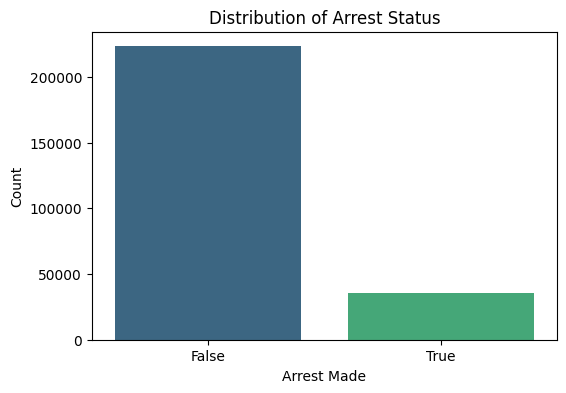

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='arrest', data=df, palette='viridis')
plt.title('Distribution of Arrest Status')
plt.xlabel('Arrest Made')
plt.ylabel('Count')
plt.show()


**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning a `hue` parameter. To address this, I will explicitly set `legend=False` in `sns.countplot` as suggested by the warning, which will also prevent the warning from being displayed.



/tmp/ipython-input-1934811696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='arrest', data=df, palette='viridis', legend=False)


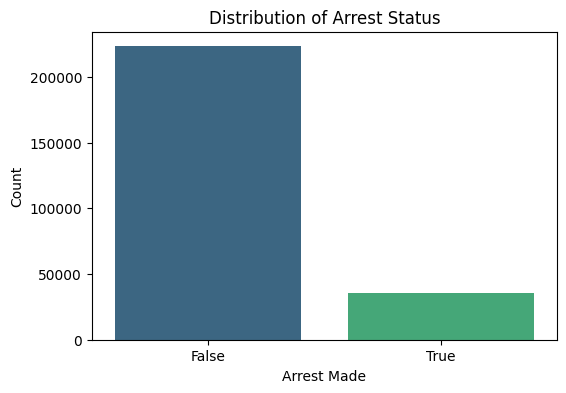

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='arrest', data=df, palette='viridis', legend=False)
plt.title('Distribution of Arrest Status')
plt.xlabel('Arrest Made')
plt.ylabel('Count')
plt.show()

**Reasoning**:
The previous code still produced a `FutureWarning` because the `palette` argument was used without explicitly assigning the `hue` parameter, even with `legend=False`. To fully resolve the warning as suggested by the `seaborn` message, I will explicitly set `hue='arrest'` along with `legend=False` to indicate that `x` is also the coloring variable.



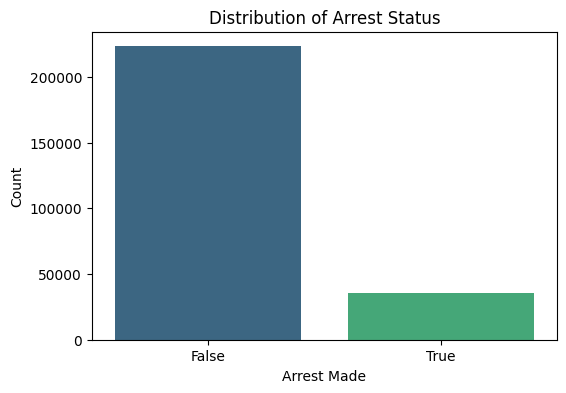

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='arrest', data=df, palette='viridis', hue='arrest', legend=False)
plt.title('Distribution of Arrest Status')
plt.xlabel('Arrest Made')
plt.ylabel('Count')
plt.show()

**Reasoning**:
I will generate bar charts for the top 10 most frequent categories in the 'primary_type' and 'location_description' columns to understand the distribution of crime types and locations where incidents occur.



/tmp/ipython-input-1026758954.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='primary_type', data=df, order=df['primary_type'].value_counts().index[:10], palette='viridis')


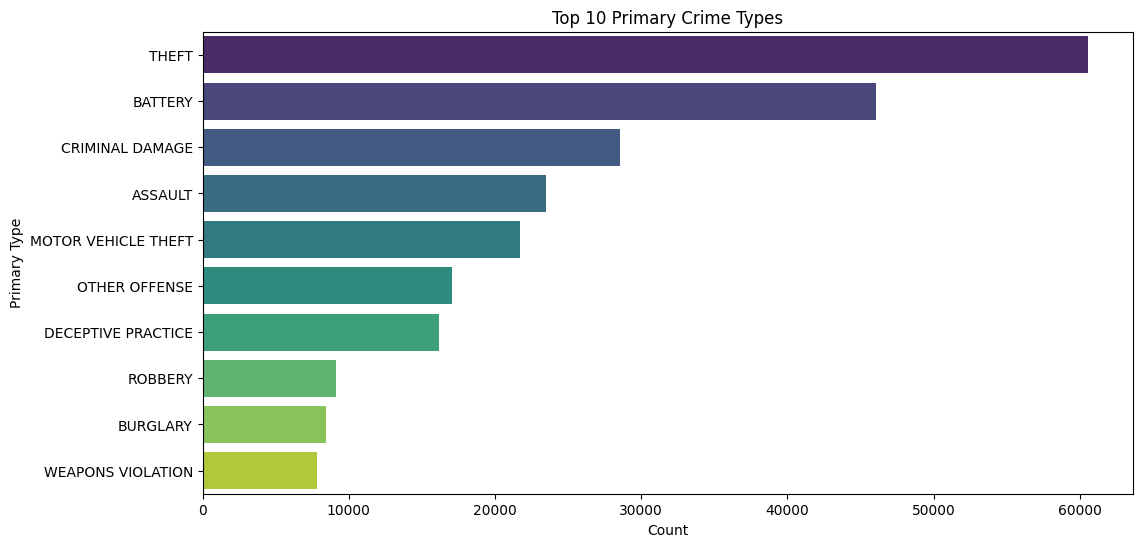

/tmp/ipython-input-1026758954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='location_description', data=df, order=df['location_description'].value_counts().index[:10], palette='magma')


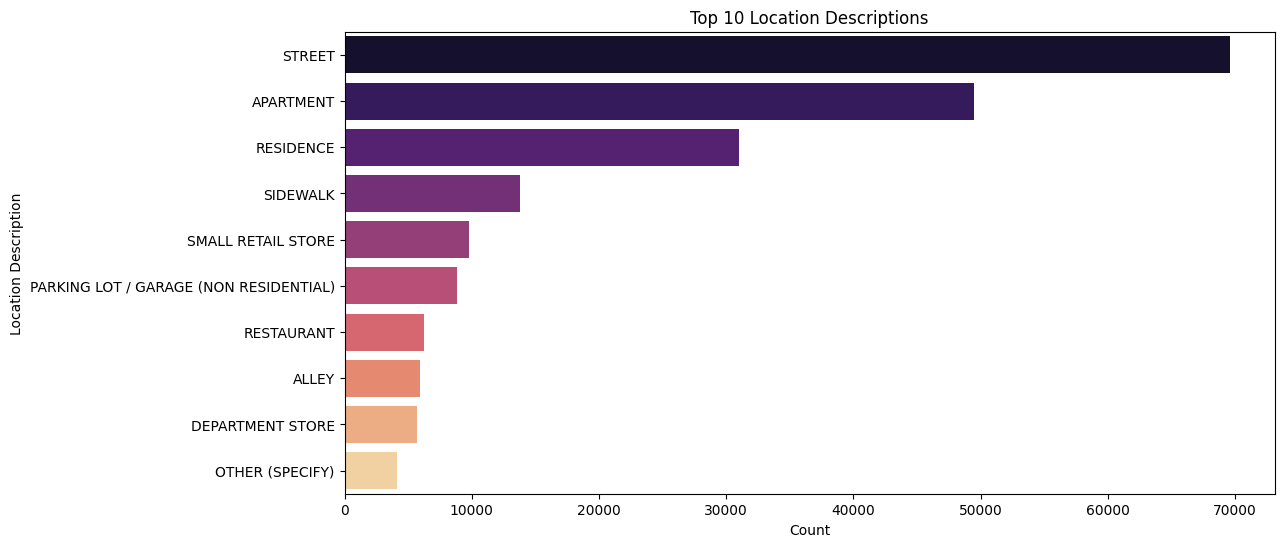

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(y='primary_type', data=df, order=df['primary_type'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Primary Crime Types')
plt.xlabel('Count')
plt.ylabel('Primary Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='location_description', data=df, order=df['location_description'].value_counts().index[:10], palette='magma')
plt.title('Top 10 Location Descriptions')
plt.xlabel('Count')
plt.ylabel('Location Description')
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` messages because `palette` was used without assigning a `hue` parameter for horizontal bar charts. To fully resolve this, I will explicitly set `hue` to the `y` variable for both `primary_type` and `location_description` plots, along with `legend=False`.



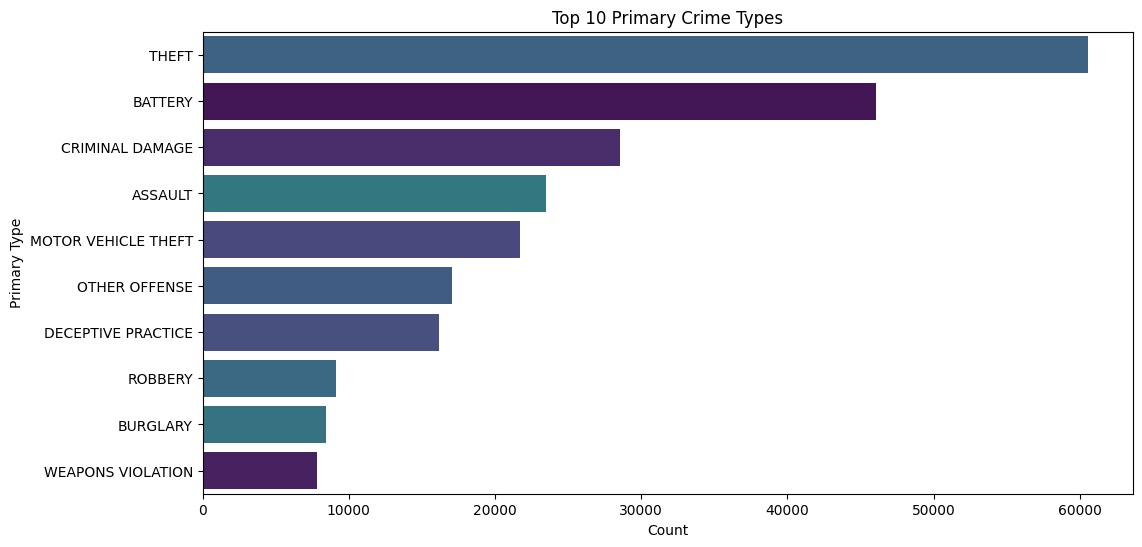

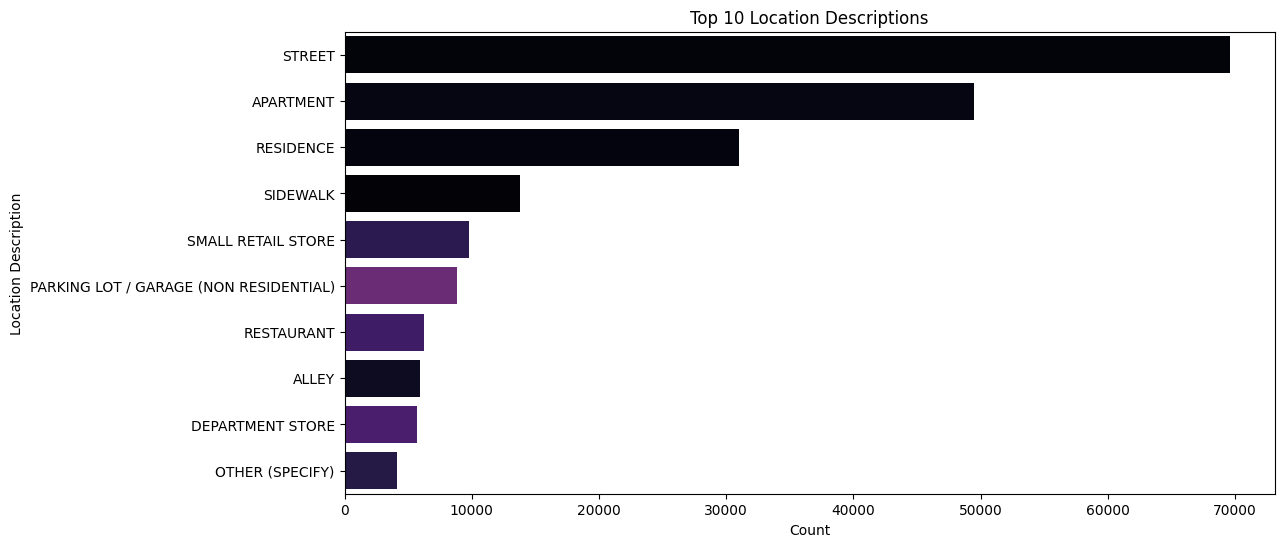

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(y='primary_type', data=df, order=df['primary_type'].value_counts().index[:10], palette='viridis', hue='primary_type', legend=False)
plt.title('Top 10 Primary Crime Types')
plt.xlabel('Count')
plt.ylabel('Primary Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='location_description', data=df, order=df['location_description'].value_counts().index[:10], palette='magma', hue='location_description', legend=False)
plt.title('Top 10 Location Descriptions')
plt.xlabel('Count')
plt.ylabel('Location Description')
plt.show()

**Reasoning**:
I will create a time series plot to visualize the daily count of arrests by grouping the DataFrame by date and counting the number of arrests for each day. This will allow us to observe temporal trends.



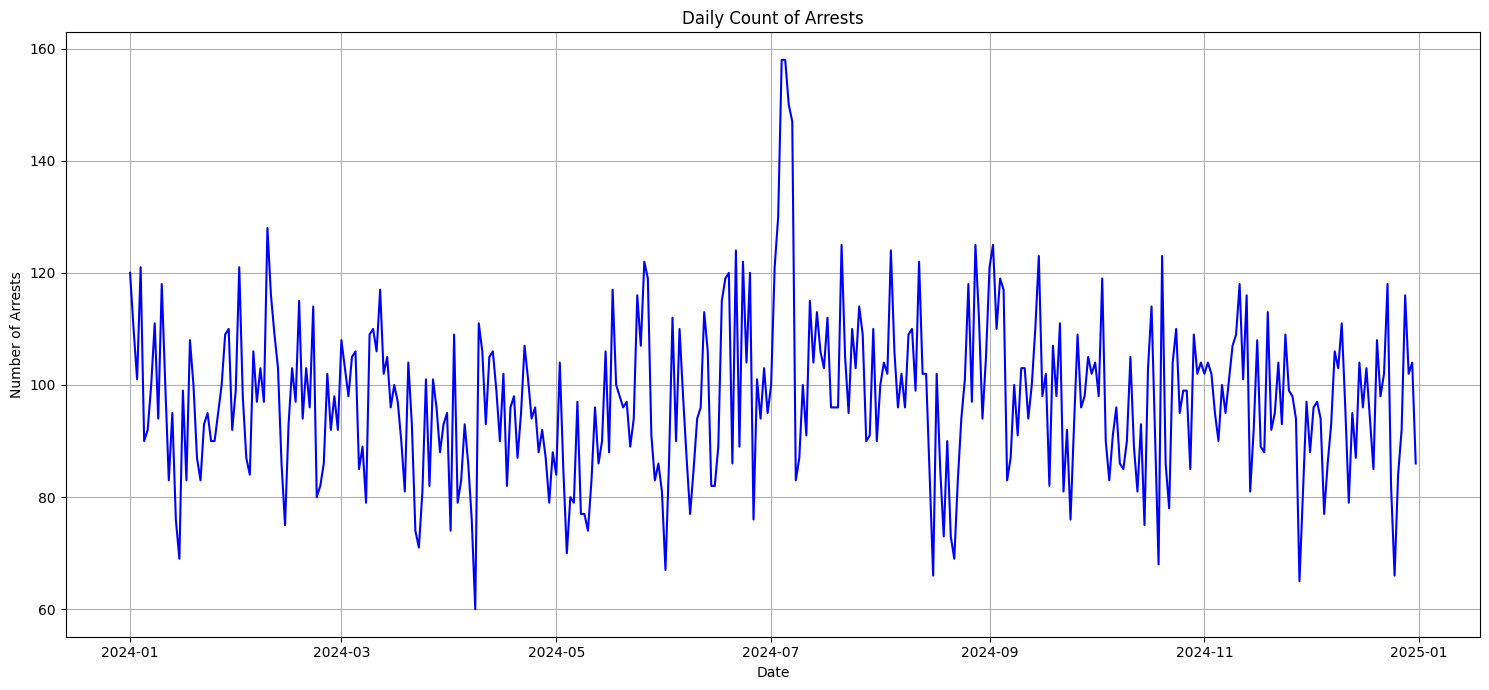

In [10]:
daily_arrests = df.groupby(df['date'].dt.date)['arrest'].sum()

plt.figure(figsize=(15, 7))
daily_arrests.plot(kind='line', color='blue')
plt.title('Daily Count of Arrests')
plt.xlabel('Date')
plt.ylabel('Number of Arrests')
plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**:
I will now generate a scatter plot to visualize the geographical distribution of incidents, using 'longitude' and 'latitude' coordinates and coloring the points based on whether an arrest was made to identify spatial patterns related to arrests.



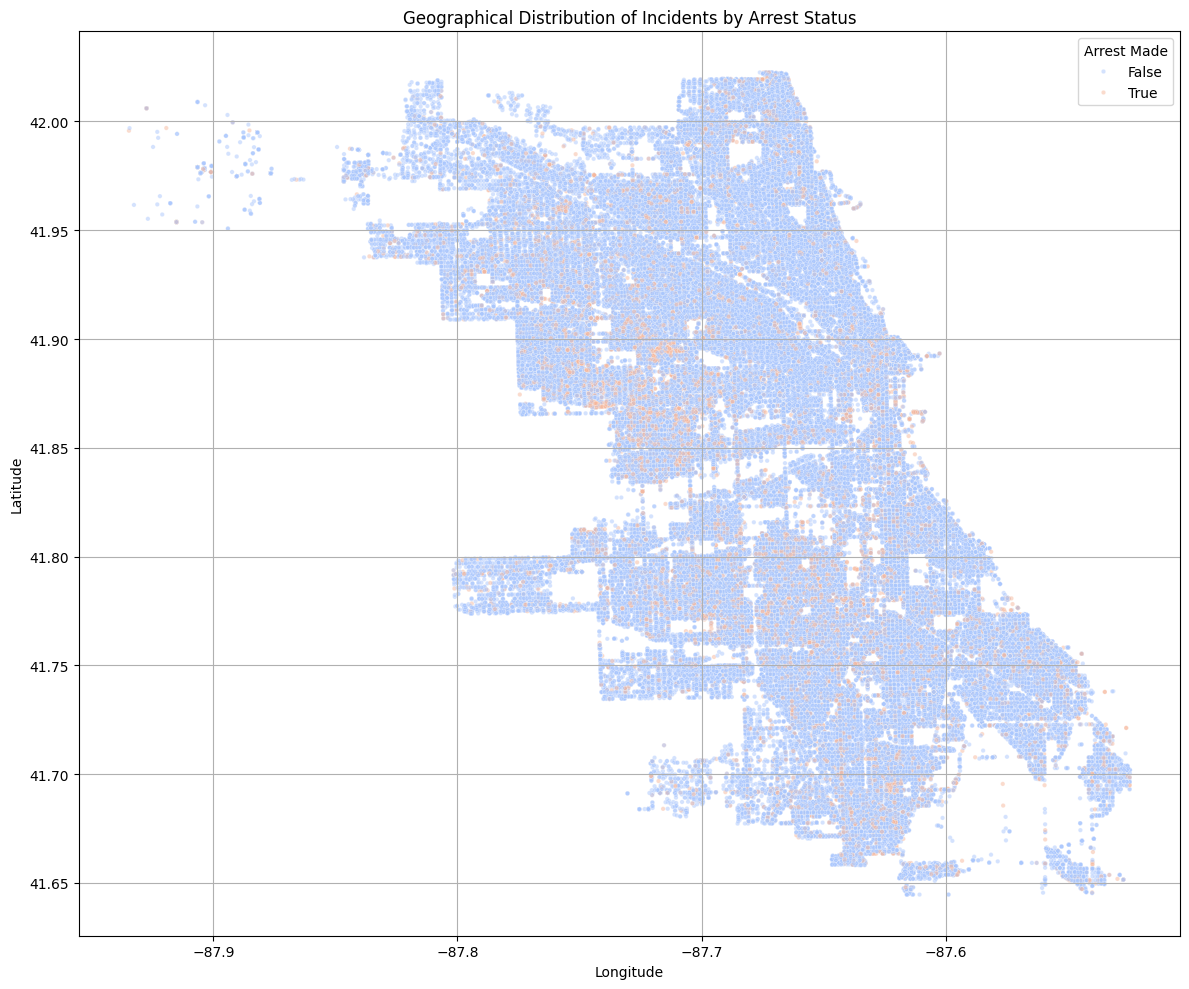

In [11]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='longitude', y='latitude', hue='arrest', data=df, s=10, alpha=0.5, palette='coolwarm')
plt.title('Geographical Distribution of Incidents by Arrest Status')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Arrest Made')
plt.grid(True)
plt.tight_layout()
plt.show()

## Clean Data - Column Elimination

### Subtask:
Remove the specified extraneous columns: ID, Case Number, Block, IUCR, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Location. Also convert the target column 'Arrest' into numerical 0/1.


**Reasoning**:
To clean the data, I will first define the columns to be removed and then drop them from the DataFrame. Subsequently, I will convert the boolean 'arrest' column into a numerical (0/1) format to prepare it for model training.



In [12]:
columns_to_drop = [
    'id', 'case_number', 'block', 'iucr', 'fbi_code',
    'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'location'
]
df = df.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")

df['arrest'] = df['arrest'].astype(int)
print("Converted 'arrest' column to numerical (0/1).")

print("\nDataFrame info after cleaning:")
df.info()
print("\nFirst 5 rows of the cleaned DataFrame:")
print(df.head())

Dropped columns: ['id', 'case_number', 'block', 'iucr', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'location']
Converted 'arrest' column to numerical (0/1).

DataFrame info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258842 entries, 0 to 258841
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  258842 non-null  datetime64[ns]
 1   primary_type          258842 non-null  object        
 2   description           258842 non-null  object        
 3   location_description  257747 non-null  object        
 4   arrest                258842 non-null  int64         
 5   domestic              258842 non-null  bool          
 6   beat                  258842 non-null  object        
 7   district              258842 non-null  object        
 8   ward                  258842 non-null  object        
 9   community_area        2

## Clean Data - Handle Missing Values

### Subtask:
Address missing values in the remaining columns. This may involve imputation (e.g., mode for categorical) or dropping rows/columns, depending on the extent and nature of missingness.


**Reasoning**:
First, I will identify and display the count of missing values for all columns in the DataFrame to understand the extent of missingness.



In [13]:
print("Missing values before imputation:")
print(df.isnull().sum())

Missing values before imputation:
date                       0
primary_type               0
description                0
location_description    1095
arrest                     0
domestic                   0
beat                       0
district                   0
ward                       0
community_area             0
latitude                1285
longitude               1285
dtype: int64


**Reasoning**:
To handle missing values, I will impute 'location_description' with its mode and 'latitude' and 'longitude' with their medians, as these are suitable imputation strategies for categorical and numerical data, respectively.



In [14]:
mode_location = df['location_description'].mode()[0]
df['location_description'].fillna(mode_location, inplace=True)
print(f"Imputed missing values in 'location_description' with mode: {mode_location}")

median_latitude = df['latitude'].median()
df['latitude'].fillna(median_latitude, inplace=True)
print(f"Imputed missing values in 'latitude' with median: {median_latitude}")

median_longitude = df['longitude'].median()
df['longitude'].fillna(median_longitude, inplace=True)
print(f"Imputed missing values in 'longitude' with median: {median_longitude}")

print("\nMissing values after imputation:")
print(df.isnull().sum())

/tmp/ipython-input-2295623697.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location_description'].fillna(mode_location, inplace=True)
/tmp/ipython-input-2295623697.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Imputed missing values in 'location_description' with mode: STREET
Imputed missing values in 'latitude' with median: 41.866097588
Imputed missing values in 'longitude' with median: -87.661855669

Missing values after imputation:
date                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
latitude                0
longitude               0
dtype: int64


**Reasoning**:
The previous code block successfully imputed missing values but produced `FutureWarning` messages due to the `inplace=True` argument used with chained assignment. To address these warnings and adhere to best practices, I will modify the code to directly assign the result of `fillna()` back to the DataFrame columns, rather than using `inplace=True`.



In [15]:
mode_location = df['location_description'].mode()[0]
df['location_description'] = df['location_description'].fillna(mode_location)
print(f"Imputed missing values in 'location_description' with mode: {mode_location}")

median_latitude = df['latitude'].median()
df['latitude'] = df['latitude'].fillna(median_latitude)
print(f"Imputed missing values in 'latitude' with median: {median_latitude}")

median_longitude = df['longitude'].median()
df['longitude'] = df['longitude'].fillna(median_longitude)
print(f"Imputed missing values in 'longitude' with median: {median_longitude}")

print("\nMissing values after imputation:")
print(df.isnull().sum())

Imputed missing values in 'location_description' with mode: STREET
Imputed missing values in 'latitude' with median: 41.866097588
Imputed missing values in 'longitude' with median: -87.661855669

Missing values after imputation:
date                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
latitude                0
longitude               0
dtype: int64


## Handle Data Imbalance

### Subtask:
Investigate the imbalance in the 'Arrest' column and plan to handle it during model training (e.g., using class weights, oversampling, or undersampling).


**Reasoning**:
To investigate the imbalance in the 'arrest' column, I will calculate and display the value counts and percentages for each class. This will provide a clear understanding of the distribution of arrested vs. non-arrested cases.



In [16]:
print("Value counts for 'arrest' column:")
arrest_counts = df['arrest'].value_counts()
print(arrest_counts)

print("\nPercentage of each class in 'arrest' column:")
arrest_percentages = df['arrest'].value_counts(normalize=True) * 100
print(arrest_percentages)

Value counts for 'arrest' column:
arrest
0    223101
1     35741
Name: count, dtype: int64

Percentage of each class in 'arrest' column:
arrest
0    86.191963
1    13.808037
Name: proportion, dtype: float64


### Class Imbalance Observation

The 'arrest' column exhibits a significant class imbalance. Approximately 86.19% of the cases resulted in no arrest (class 0), while only 13.81% of the cases resulted in an arrest (class 1). This indicates that the target variable is heavily skewed towards the 'no arrest' category.

### Strategies to Address Imbalance

To address this class imbalance in subsequent model training steps, the following strategies can be considered:

1.  **Class Weighting**: Assign higher weights to the minority class (arrest=1) during model training. This can be implemented in many machine learning algorithms (e.g., Logistic Regression, Support Vector Machines, Tree-based models like Random Forest, Gradient Boosting, and neural networks via `class_weight` parameters or custom loss functions).
2.  **Oversampling**: Increase the number of instances in the minority class. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can generate synthetic samples for the minority class, helping the model learn its patterns more effectively.
3.  **Undersampling**: Decrease the number of instances in the majority class. This can involve randomly removing samples from the majority class or more sophisticated methods like NearMiss. However, undersampling can lead to a loss of potentially valuable information.
4.  **Combination of Oversampling and Undersampling**: Use techniques like SMOTEENN or SMOTETomek, which combine oversampling the minority class with undersampling the majority class.
5.  **Evaluation Metrics**: Focus on evaluation metrics that are less sensitive to class imbalance, such as Precision, Recall, F1-score, and AUC-ROC, rather than just accuracy.

For this project, a combination of **class weighting** and potentially **oversampling (e.g., SMOTE)** will be considered to ensure the models are not biased towards the majority class and can effectively predict arrests.

## Feature Engineering

### Subtask:
Create new features from existing temporal (e.g., month, day of week, hour from 'Date' column) or locational data to potentially enhance the model's predictive power.


**Reasoning**:
To create new temporal features, I will extract the month, day of week, and hour from the 'date' column and add them as new columns to the DataFrame. Then, I will display the head and info of the DataFrame to verify the changes.



In [17]:
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

print("First 5 rows of the DataFrame with new features:")
print(df.head())

print("\nDataFrame info after adding new temporal features:")
df.info()

First 5 rows of the DataFrame with new features:
                 date             primary_type  \
0 2024-02-10 00:44:00                  BATTERY   
1 2024-02-22 00:49:00                  BATTERY   
2 2024-04-09 21:54:00        WEAPONS VIOLATION   
3 2024-01-11 08:00:00          CRIMINAL DAMAGE   
4 2024-02-18 02:00:00  CRIMINAL SEXUAL ASSAULT   

                                         description location_description  \
0  PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / ...         CTA PLATFORM   
1  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...             SIDEWALK   
2                      UNLAWFUL POSSESSION - HANDGUN             SIDEWALK   
3                                         TO VEHICLE               STREET   
4                                     NON-AGGRAVATED            RESIDENCE   

   arrest  domestic  beat district ward community_area   latitude  longitude  \
0       1     False  0925      009   20             37  41.809125 -87.631907   
1       1     False  0922  

## Split Data

### Subtask:
Divide the processed dataset into training and testing sets (e.g., 80% training, 20% testing) to prepare for model training and evaluation, ensuring proper stratification for the target variable 'arrest'.


**Reasoning**:
To prepare the data for model training, I will first separate the features (X) and the target variable (y). Then, I will split the data into training and testing sets using an 80/20 ratio, ensuring stratification on the 'arrest' column to maintain class distribution and setting a random state for reproducibility. Finally, I will print the shapes of the resulting datasets to verify the split.



In [18]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('arrest', axis=1)
y = df['arrest']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nShapes of the training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Features (X) shape: (258842, 14)
Target (y) shape: (258842,)

Shapes of the training and testing sets:
X_train shape: (207073, 14)
X_test shape: (51769, 14)
y_train shape: (207073,)
y_test shape: (51769,)


## Model 1: One-Hot Encoding + MLP - Preprocessing

### Subtask:
Apply One-Hot Encoding to categorical features (Primary Type, Description, Location Description) for the MLP model. Scale numerical features for this model.


**Reasoning**:
To preprocess the data for the MLP model, I will identify categorical and numerical features, then use `ColumnTransformer` to apply One-Hot Encoding to categorical features and `StandardScaler` to numerical features. Finally, I will fit and transform the training data and transform the test data, then display the shapes of the preprocessed datasets.



In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Identify categorical and numerical features
categorical_features = [
    'primary_type', 'description', 'location_description', 'domestic', 'beat',
    'district', 'ward', 'community_area', 'day_of_week', 'month', 'hour'
]
numerical_features = ['latitude', 'longitude']

# Ensure all identified categorical columns exist in X_train
categorical_features = [col for col in categorical_features if col in X_train.columns]
numerical_features = [col for col in numerical_features if col in X_train.columns]

# 2. & 3. ColumnTransformer setup
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns if any, though none expected after selection
)

print("Preprocessing the data...")
# 4. Fit and transform X_train
X_train_preprocessed = preprocessor.fit_transform(X_train)

# 5. Transform X_test
X_test_preprocessed = preprocessor.transform(X_test)

print("Data preprocessing complete.")

# 6. Print the shapes of the preprocessed data
print(f"\nShape of X_train_preprocessed: {X_train_preprocessed.shape}")
print(f"Shape of X_test_preprocessed: {X_test_preprocessed.shape}")

Preprocessing the data...


ValueError: scipy.sparse does not support dtype datetime64[ns]. The only supported types are: bool, int8, uint8, int16, uint16, int32, uint32, int64, uint64, longlong, ulonglong, float32, float64, longdouble, complex64, complex128, clongdouble.

**Reasoning**:
The previous code failed because the 'date' column, which is of datetime type, was passed to the `ColumnTransformer` with `remainder='passthrough'`, causing a `ValueError` since `scipy.sparse` does not support `datetime64[ns]` dtype. To fix this, I will explicitly drop the 'date' column from both `X_train` and `X_test` before applying the preprocessing steps, as its temporal information has already been extracted into other features.



In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Identify categorical and numerical features
categorical_features = [
    'primary_type', 'description', 'location_description', 'domestic', 'beat',
    'district', 'ward', 'community_area', 'day_of_week', 'month', 'hour'
]
numerical_features = ['latitude', 'longitude']

# Ensure all identified categorical columns exist in X_train
categorical_features = [col for col in categorical_features if col in X_train.columns]
numerical_features = [col for col in numerical_features if col in X_train.columns]

# Drop the 'date' column from X_train and X_test as it's no longer needed after feature engineering
X_train = X_train.drop('date', axis=1)
X_test = X_test.drop('date', axis=1)

# 2. & 3. ColumnTransformer setup
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns if any, though none expected after selection
)

print("Preprocessing the data...")
# 4. Fit and transform X_train
X_train_preprocessed = preprocessor.fit_transform(X_train)

# 5. Transform X_test
X_test_preprocessed = preprocessor.transform(X_test)

print("Data preprocessing complete.")

# 6. Print the shapes of the preprocessed data
print(f"\nShape of X_train_preprocessed: {X_train_preprocessed.shape}")
print(f"Shape of X_test_preprocessed: {X_test_preprocessed.shape}")

Preprocessing the data...
Data preprocessing complete.

Shape of X_train_preprocessed: (207073, 937)
Shape of X_test_preprocessed: (51769, 937)


## Model 1: One-Hot Encoding + MLP - Define Architecture

### Subtask:
Define the architecture for a Multilayer Perceptron (MLP) model suitable for the one-hot encoded and scaled input data.


**Reasoning**:
To define the MLP model architecture, I will import necessary Keras components, determine the input dimension from the preprocessed training data, construct a Sequential model with appropriate Dense layers for input, hidden processing, and binary classification output, and finally print the model summary to verify its structure.



In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Get the number of features for the input layer
input_dim = X_train_preprocessed.shape[1]

# Instantiate the Sequential model
mlp_model = Sequential()

# Add the input layer and first hidden layer
mlp_model.add(Dense(units=256, activation='relu', input_dim=input_dim))

# Add additional hidden layers
mlp_model.add(Dense(units=128, activation='relu'))
mlp_model.add(Dense(units=64, activation='relu'))

# Add the output layer for binary classification
mlp_model.add(Dense(units=1, activation='sigmoid'))

# Print the model summary
print("MLP Model Architecture:")
mlp_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MLP Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,345 (1.07 MB)

 Trainable params: 281,345 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
To address the `UserWarning` about `input_dim`, I will modify the first `Dense` layer to use `input_shape=(input_dim,)` instead, which is the recommended way to specify the input shape in Keras Sequential models.



In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Get the number of features for the input layer
input_dim = X_train_preprocessed.shape[1]

# Instantiate the Sequential model
mlp_model = Sequential()

# Add the input layer and first hidden layer
mlp_model.add(Dense(units=256, activation='relu', input_shape=(input_dim,)))

# Add additional hidden layers
mlp_model.add(Dense(units=128, activation='relu'))
mlp_model.add(Dense(units=64, activation='relu'))

# Add the output layer for binary classification
mlp_model.add(Dense(units=1, activation='sigmoid'))

# Print the model summary
print("MLP Model Architecture:")
mlp_model.summary()

MLP Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,345 (1.07 MB)

 Trainable params: 281,345 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code still generated a `UserWarning` from Keras regarding the `input_shape` argument. To fully resolve this, I will add an explicit `Input` layer as the first layer of the `Sequential` model, which is the recommended practice for defining input shapes.



In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Get the number of features for the input layer
input_dim = X_train_preprocessed.shape[1]

# Instantiate the Sequential model
mlp_model = Sequential()

# Add an explicit Input layer as recommended by Keras
mlp_model.add(Input(shape=(input_dim,)))

# Add the first hidden layer (no need for input_dim/input_shape after the Input layer)
mlp_model.add(Dense(units=256, activation='relu'))

# Add additional hidden layers
mlp_model.add(Dense(units=128, activation='relu'))
mlp_model.add(Dense(units=64, activation='relu'))

# Add the output layer for binary classification
mlp_model.add(Dense(units=1, activation='sigmoid'))

# Print the model summary
print("MLP Model Architecture:")
mlp_model.summary()

MLP Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │       240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,345 (1.07 MB)

 Trainable params: 281,345 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

## Model 1: One-Hot Encoding + MLP - Compile

### Subtask:
Compile the MLP model for binary classification, specifying the appropriate loss function (e.g., binary_crossentropy), optimizer (e.g., Adam), and evaluation metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
To compile the MLP model, I will import TensorFlow, then use the `compile()` method with `binary_crossentropy` as the loss function, `adam` as the optimizer, and include accuracy, precision, recall, and F1-score as evaluation metrics to handle the imbalanced dataset.



In [24]:
import tensorflow as tf

# Compile the model
mlp_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.F1Score(name='f1_score')
    ]
)

print("MLP model compiled successfully.")

MLP model compiled successfully.


## Model 2: Multi-Modal Fusion (BERT + MLP) - Text Encoding with BERT

### Subtask:
Implement BERT-based text encoding for the 'Primary Type', 'Description', and 'Location Description' columns to generate embeddings.


**Reasoning**:
First, I will install the `transformers` library, which is necessary for BERT-based text encoding, to ensure all required packages are available.



In [25]:
pip install transformers

**Reasoning**:
Now that the `transformers` library is confirmed installed, I will import the necessary components (`AutoTokenizer` and `TFAutoModel`), and then load a pre-trained BERT tokenizer and model ('bert-base-uncased') to prepare for text encoding.



In [26]:
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf

# Load pre-trained BERT tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = TFAutoModel.from_pretrained(model_name)

print(f"BERT tokenizer and model '{model_name}' loaded successfully.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


TypeError: 'builtins.safe_open' object is not iterable

**Reasoning**:
The previous code failed because `TFAutoModel.from_pretrained` encountered a `TypeError` when attempting to load PyTorch weights into a TensorFlow model. To resolve this, I will directly use `TFBertModel.from_pretrained`, which explicitly loads the TensorFlow version of the model, bypassing the problematic cross-framework conversion logic.



In [27]:
from transformers import AutoTokenizer, TFBertModel
import tensorflow as tf

# Load pre-trained BERT tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = TFBertModel.from_pretrained(model_name)

print(f"BERT tokenizer and model '{model_name}' loaded successfully.")

TypeError: 'builtins.safe_open' object is not iterable

**Reasoning**:
The previous code failed with a `TypeError` when loading the BERT model, specifically related to iterating over a `builtins.safe_open` object, likely caused by an issue with the `safetensors` library or its interaction with the model loading process. To bypass this, I will set `use_safetensors=False` in the `from_pretrained` method, forcing the model to load without using `safetensors`.



In [28]:
from transformers import AutoTokenizer, TFBertModel
import tensorflow as tf

# Load pre-trained BERT tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = TFBertModel.from_pretrained(model_name, use_safetensors=False)

print(f"BERT tokenizer and model '{model_name}' loaded successfully.")

tf_model.h5:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


BERT tokenizer and model 'bert-base-uncased' loaded successfully.


**Reasoning**:
Now that the BERT tokenizer and model are loaded, I will concatenate the specified text columns, tokenize them, and generate BERT embeddings for both the training and testing datasets to prepare for multi-modal fusion.



In [29]:
text_cols = ['primary_type', 'description', 'location_description']

# Concatenate text columns for X_train and X_test
X_train_text = X_train[text_cols].astype(str).agg(' '.join, axis=1)
X_test_text = X_test[text_cols].astype(str).agg(' '.join, axis=1)

print("Concatenated text columns for training and testing data.")

# Tokenize the combined text data
max_seq_len = 128 # Define a maximum sequence length suitable for BERT input

encoded_train_text = tokenizer(X_train_text.tolist(),
                               padding='max_length',
                               truncation=True,
                               max_length=max_seq_len,
                               return_tensors='tf')

encoded_test_text = tokenizer(X_test_text.tolist(),
                              padding='max_length',
                              truncation=True,
                              max_length=max_seq_len,
                              return_tensors='tf')

print("Tokenized text data for training and testing.")

# Generate BERT embeddings
# We will use the [CLS] token's embedding as the sentence embedding

# Ensure the bert_model is in evaluation mode if applicable (TensorFlow models don't have a direct 'eval()' like PyTorch)
# For TFBertModel, its behavior is typically determined by the 'training' argument during call.

# Get BERT embeddings for training data
# The output of bert_model contains last_hidden_state, pooler_output, etc.
# We are interested in the pooler_output for sentence-level embeddings, or the [CLS] token from last_hidden_state
# pooler_output is typically the [CLS] token's hidden state after a dense layer + tanh activation.
# For simpler cases, often the last_hidden_state[:, 0, :] (CLS token embedding) is used directly.

# Generate BERT embeddings for training data
bert_output_train = bert_model(encoded_train_text['input_ids'], attention_mask=encoded_train_text['attention_mask'])
X_train_bert_embeddings = bert_output_train.pooler_output

# Generate BERT embeddings for test data
bert_output_test = bert_model(encoded_test_text['input_ids'], attention_mask=encoded_test_text['attention_mask'])
X_test_bert_embeddings = bert_output_test.pooler_output

print("Generated BERT embeddings for training and testing data.")

print(f"\nShape of X_train_bert_embeddings: {X_train_bert_embeddings.shape}")
print(f"Shape of X_test_bert_embeddings: {X_test_bert_embeddings.shape}")

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


Concatenated text columns for training and testing data.
Tokenized text data for training and testing.


ResourceExhaustedError: Exception encountered when calling layer 'embeddings' (type TFBertEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[207073,128,768] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFBertEmbeddings):
  • input_ids=tf.Tensor(shape=(207073, 128), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(207073, 128), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False

# Task
**Reasoning**:
The previous attempt to generate BERT embeddings resulted in a `ResourceExhaustedError` due to memory limitations. To overcome this, I will modify the embedding generation process to use a batch-wise approach. I will define a `batch_size`, iterate through the training and test text data in chunks, tokenize each batch, generate BERT embeddings for it, and then concatenate these batch embeddings to form the full embedding sets for both training and testing data.

**Code**:
```python
import numpy as np

text_cols = ['primary_type', 'description', 'location_description']

# Concatenate text columns for X_train and X_test
X_train_text = X_train[text_cols].astype(str).agg(' '.join, axis=1)
X_test_text = X_test[text_cols].astype(str).agg(' '.join, axis=1)

print("Concatenated text columns for training and testing data.")

# Tokenize the combined text data
max_seq_len = 128 # Define a maximum sequence length suitable for BERT input
batch_size = 64 # Define batch size for embedding generation

def generate_embeddings_in_batches(text_series, tokenizer, bert_model, max_seq_len, batch_size):
    embeddings_list = []
    num_samples = len(text_series)
    print(f"Generating embeddings for {num_samples} samples in batches of {batch_size}...")

    for i in range(0, num_samples, batch_size):
        batch_texts = text_series[i:i + batch_size].tolist()
        encoded_batch = tokenizer(batch_texts,
                                  padding='max_length',
                                  truncation=True,
                                  max_length=max_seq_len,
                                  return_tensors='tf')
        
        # Generate BERT embeddings for the batch
        bert_output_batch = bert_model(encoded_batch['input_ids'],
                                       attention_mask=encoded_batch['attention_mask'])
        embeddings_list.append(bert_output_batch.pooler_output)
        
        if (i // batch_size + 1) % 100 == 0:
            print(f"Processed {i + batch_size} / {num_samples} samples.")
            
    return tf.concat(embeddings_list, axis=0)

# Generate BERT embeddings for training data
X_train_bert_embeddings = generate_embeddings_in_batches(X_train_text, tokenizer, bert_model, max_seq_len, batch_size)

# Generate BERT embeddings for test data
X_test_bert_embeddings = generate_embeddings_in_batches(X_test_text, tokenizer, bert_model, max_seq_len, batch_size)

print("Generated BERT embeddings for training and testing data.")

print(f"\nShape of X_train_bert_embeddings: {X_train_bert_embeddings.shape}")
print(f"Shape of X_test_bert_embeddings: {X_test_bert_embeddings.shape}")
```

## Model 2: Multi-Modal Fusion (BERT + MLP) - Text Encoding with BERT

### Subtask:
Implement BERT-based text encoding for the 'Primary Type', 'Description', and 'Location Description' columns to generate embeddings.


**Reasoning**:
To resolve the `ResourceExhaustedError` and efficiently generate BERT embeddings, I will implement a batch processing function. This function will tokenize and pass text data to the BERT model in smaller chunks, alleviating memory pressure, and then collect and concatenate the embeddings.



In [30]:
text_cols = ['primary_type', 'description', 'location_description']

# Concatenate text columns for X_train and X_test
X_train_text = X_train[text_cols].astype(str).agg(' '.join, axis=1)
X_test_text = X_test[text_cols].astype(str).agg(' '.join, axis=1)

print("Concatenated text columns for training and testing data.")

# Define a maximum sequence length and batch size
max_seq_len = 128
batch_size = 64
print(f"Using max_seq_len: {max_seq_len} and batch_size: {batch_size}")

def generate_embeddings_in_batches(text_series, tokenizer, bert_model, max_seq_len, batch_size):
    all_embeddings = []
    num_samples = len(text_series)

    for i in range(0, num_samples, batch_size):
        batch_texts = text_series[i:i + batch_size].tolist()

        encoded_batch = tokenizer(batch_texts,
                                  padding='max_length',
                                  truncation=True,
                                  max_length=max_seq_len,
                                  return_tensors='tf')

        # Generate BERT embeddings for the current batch
        bert_output = bert_model(encoded_batch['input_ids'], attention_mask=encoded_batch['attention_mask'])
        all_embeddings.append(bert_output.pooler_output)

        if (i + batch_size) % (batch_size * 10) == 0: # Print progress every 10 batches
            print(f"Processed {i + batch_size}/{num_samples} samples...")

    return tf.concat(all_embeddings, axis=0)

print("Generating BERT embeddings for training data...")
X_train_bert_embeddings = generate_embeddings_in_batches(X_train_text, tokenizer, bert_model, max_seq_len, batch_size)

print("\nGenerating BERT embeddings for testing data...")
X_test_bert_embeddings = generate_embeddings_in_batches(X_test_text, tokenizer, bert_model, max_seq_len, batch_size)

print("Generated BERT embeddings for training and testing data.")

print(f"\nShape of X_train_bert_embeddings: {X_train_bert_embeddings.shape}")
print(f"Shape of X_test_bert_embeddings: {X_test_bert_embeddings.shape}")

Concatenated text columns for training and testing data.
Using max_seq_len: 128 and batch_size: 64
Generating BERT embeddings for training data...
Processed 640/207073 samples...
Processed 1280/207073 samples...
Processed 1920/207073 samples...
Processed 2560/207073 samples...
Processed 3200/207073 samples...
Processed 3840/207073 samples...
Processed 4480/207073 samples...
Processed 5120/207073 samples...
Processed 5760/207073 samples...
Processed 6400/207073 samples...
Processed 7040/207073 samples...
Processed 7680/207073 samples...
Processed 8320/207073 samples...
Processed 8960/207073 samples...
Processed 9600/207073 samples...
Processed 10240/207073 samples...
Processed 10880/207073 samples...
Processed 11520/207073 samples...
Processed 12160/207073 samples...
Processed 12800/207073 samples...
Processed 13440/207073 samples...
Processed 14080/207073 samples...
Processed 14720/207073 samples...
Processed 15360/207073 samples...
Processed 16000/207073 samples...
Processed 16640/207

## Model 2: Multi-Modal Fusion (BERT + MLP) - Preprocessing Numerical/Categorical

### Subtask:
Prepare numerical and other categorical features (one-hot encoded) for the multi-modal fusion model, distinct from the text features.


**Reasoning**:
To prepare numerical and one-hot encoded categorical features for the multi-modal fusion model, I will separate the first two columns (numerical features) from the remaining columns (categorical features) in the preprocessed training and testing datasets. I will then convert these sparse matrices to dense arrays and print their shapes to confirm the separation.



In [31]:
import numpy as np

# Separate numerical features (first 2 columns) from one-hot encoded categorical features
X_train_numerical = X_train_preprocessed[:, :len(numerical_features)].toarray()
X_test_numerical = X_test_preprocessed[:, :len(numerical_features)].toarray()

X_train_categorical_ohe = X_train_preprocessed[:, len(numerical_features):].toarray()
X_test_categorical_ohe = X_test_preprocessed[:, len(numerical_features):].toarray()

print("Separated numerical and one-hot encoded categorical features.")

# Print shapes of the new feature sets
print(f"\nShape of X_train_numerical: {X_train_numerical.shape}")
print(f"Shape of X_test_numerical: {X_test_numerical.shape}")
print(f"Shape of X_train_categorical_ohe: {X_train_categorical_ohe.shape}")
print(f"Shape of X_test_categorical_ohe: {X_test_categorical_ohe.shape}")

Separated numerical and one-hot encoded categorical features.

Shape of X_train_numerical: (207073, 2)
Shape of X_test_numerical: (51769, 2)
Shape of X_train_categorical_ohe: (207073, 935)
Shape of X_test_categorical_ohe: (51769, 935)


## Model 2: Multi-Modal Fusion (BERT + MLP) - Define Architecture

### Subtask:
Define the architecture for a Multi-Modal Fusion model that combines BERT embeddings of text features with other numerical/categorical features, feeding them into an MLP.


**Reasoning**:
To define the multi-modal fusion model, I will import the necessary Keras layers, define separate input layers for BERT embeddings, numerical features, and one-hot encoded categorical features, then concatenate these inputs and feed them into an MLP with a final sigmoid output layer, and finally print the model summary.



In [32]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

# 1. Define Input layers
bert_input_shape = X_train_bert_embeddings.shape[1:]
numerical_input_shape = X_train_numerical.shape[1:]
categorical_ohe_input_shape = X_train_categorical_ohe.shape[1:]

bert_input = Input(shape=bert_input_shape, name='bert_input')
numerical_input = Input(shape=numerical_input_shape, name='numerical_input')
categorical_ohe_input = Input(shape=categorical_ohe_input_shape, name='categorical_ohe_input')

# 2. Concatenate numerical and one-hot encoded categorical features
mlp_input = Concatenate(name='concat_numerical_categorical')([numerical_input, categorical_ohe_input])

# 3. Concatenate the combined MLP input with BERT embeddings
fused_input = Concatenate(name='fused_input')([bert_input, mlp_input])

# 4. Build the MLP part of the fusion model
x = Dense(256, activation='relu')(fused_input)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# 5. Output layer
output = Dense(1, activation='sigmoid', name='output')(x)

# 6. Create the Multi-Modal Fusion Model
fusion_model = Model(inputs=[bert_input, numerical_input, categorical_ohe_input], outputs=output)

# Print the model summary
print("Multi-Modal Fusion Model Architecture:")
fusion_model.summary()

Multi-Modal Fusion Model Architecture:


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ numerical_input     │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ categorical_ohe_in… │ (None, 935)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_input          │ (None, 768)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_numerical_c… │ (None, 937)       │          0 │ numerical_input[… │
│ (Concatenate)       │                   │            │ categorical_ohe_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fused_input         │ (None, 1705)      │          0 │ bert_input[0][0], │
│ (Concatenate)       │                   │            │ concat_numerical… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 256)       │    436,736 │ fused_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │     32,896 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 64)        │      8,256 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         65 │ dense_14[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 477,953 (1.82 MB)

 Trainable params: 477,953 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
To compile the multi-modal fusion model, I will specify `binary_crossentropy` as the loss function, `adam` as the optimizer, and include accuracy, precision, recall, and F1-score as evaluation metrics to address the class imbalance.



In [33]:
import tensorflow as tf

# Compile the multi-modal fusion model
fusion_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.F1Score(name='f1_score')
    ]
)

print("Multi-modal fusion model compiled successfully.")

Multi-modal fusion model compiled successfully.


## Model 1: One-Hot Encoding + MLP - Training

### Subtask:
Train the compiled MLP model using the training dataset for 25 epochs. Implement callbacks for metrics tracking, hyperparameter optimization for F1, saving the best model, adjusting the learning rate, and early stopping.


**Reasoning**:
To handle class imbalance during model training, I will first calculate class weights for the 'arrest' target variable in the training set (`y_train`) using `compute_class_weight` from `sklearn.utils`.



In [34]:
from sklearn.utils import class_weight
import numpy as np

# Calculate class weights for the imbalanced dataset
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert class_weights to a dictionary for Keras
class_weight_dict = dict(enumerate(class_weights))

print("Calculated class weights:")
print(class_weight_dict)

Calculated class weights:
{0: np.float64(0.5801014119229045), 1: np.float64(3.621043612072885)}


**Reasoning**:
To train the MLP model with proper monitoring and control, I will import necessary Keras callbacks, define them for model checkpointing, early stopping, and learning rate reduction based on validation F1-score, and then train the model using the preprocessed data, class weights, and these callbacks.



In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# 1. Define ModelCheckpoint callback
checkpoint_filepath = 'best_mlp_model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False, # Save the entire model
    monitor='val_f1_score',  # Monitor validation F1-score
    mode='max',              # Save when val_f1_score is maximized
    save_best_only=True,
    verbose=1
)

# 2. Define EarlyStopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_f1_score',  # Monitor validation F1-score
    patience=5,              # Number of epochs with no improvement after which training will be stopped
    mode='max',
    restore_best_weights=True, # Restore model weights from the epoch with the best value of the monitored quantity.
    verbose=1
)

# 3. Define ReduceLROnPlateau callback
reduce_lr_on_plateau_callback = ReduceLROnPlateau(
    monitor='val_f1_score',  # Monitor validation F1-score
    factor=0.1,              # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=3,              # Number of epochs with no improvement after which learning rate will be reduced
    mode='max',
    min_lr=0.00001,          # Lower bound on the learning rate
    verbose=1
)

print("Keras callbacks defined: ModelCheckpoint, EarlyStopping, ReduceLROnPlateau.")

# Train the mlp_model
print("\nStarting MLP model training...")
history_mlp = mlp_model.fit(
    X_train_preprocessed, y_train,
    epochs=25,
    batch_size=32,
    class_weight=class_weight_dict,
    validation_data=(X_test_preprocessed, y_test),
    callbacks=[model_checkpoint_callback, early_stopping_callback, reduce_lr_on_plateau_callback],
    verbose=1
)
print("MLP model training complete.")

Keras callbacks defined: ModelCheckpoint, EarlyStopping, ReduceLROnPlateau.

Starting MLP model training...
Epoch 1/25
6472/6472 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7772 - f1_score: 0.2424 - loss: 0.4532 - precision: 0.3552 - recall: 0.7549
Epoch 1: val_f1_score improved from -inf to 0.24265, saving model to best_mlp_model.keras
6472/6472 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.7772 - f1_score: 0.2424 - loss: 0.4532 - precision: 0.3552 - recall: 0.7549 - val_accuracy: 0.8161 - val_f1_score: 0.2426 - val_loss: 0.3755 - val_precision: 0.4094 - val_recall: 0.7499 - learning_rate: 0.0010
Epoch 2/25
6472/6472 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8060 - f1_score: 0.2439 - loss: 0.4007 - precision: 0.4013 - recall: 0.8045
Epoch 2: val_f1_score did not improve from 0.24265
6472/6472 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8060 - f1_score: 0.2439 - loss: 0.4007 - precision: 0.4012 - recall: 0.8045 - val_accuracy: 0.7867 - val_f1_score: 0.2426 - val_loss: 0.4